<a href="https://colab.research.google.com/github/hhaller0826/ci2-fairness-ncm/blob/main/IntroFairnessNCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction/Explanation

Causal Inference 

"while probabilities encode our beliefs about a static world, causality tells us whether and how probabilities change when the world changes, be it by intervention or by act of imagination". -- Book of Why

In [2]:


from src.graph.default_graphs import *
from src.graph.causal_graph import CausalGraph
from src.graph.utils import *

from trashfiles.dummy_functions import *

from src.causalaibook.fusion import * 


# Create a Causal Graph

A causal graph (or "causal diagram") represents the relationships between the features in your data. Each node on the graph may represent one or more of these features. Please note that if a single node represents multiple features, we will not be able to distinguish between these features when doing causal analysis. 

If the values in one node may impact the values in another node, the graph will have a directed edge from the first node to the one that it affects. 

Sometimes there are confounders between two variables (lets call them A and B), meaning they are both directly impacted by the same third variable C. If C is one of the nodes on your graph, then there will be one directed edge from C to A, and another from C to B. If C is *not* one of the nodes on your graph, then we will create a bi-directed edge between A and B to signify that they are confounded. 

Examples of some graphs:

In [2]:
# TODO: add examples and plot them
# TODO: express how maybe X = ['race','age'] OR X1 = 'race' and X2 = 'age' 
# TODO: express how you don't need an arrow for indirect effects. Like if A-->B-->C we may not need an arrow A-->C.

# I am tryna give them the bare minimum of what they need to know to implement this. 

### Define your graph below.

You can use one of the pre-defined graphs, like so:
```
my_graph = get_predefined_graph(type='____')
```
Valid types include 'bow', 'backdoor', etc. ***TODO***


Alternatively, you create your own graph. Here is an example:
```
nodes = ['W', 'X', 'Y', 'Z']
directed_edges = [('X', 'Y'),
        ('X', 'W'),
        ('Z', 'Y'),
        ('Z', 'W'),
        ('W', 'Y')]

bidirected_edges = [('X', 'Z'), ('Z', 'Y')]

my_graph = CausalGraph(nodes, directed_edges, bidirected_edges)
```

*Remember*: when defining the ```directed_edges```, the arrow goes from the first node to the second one. So for example, ```directed_edges = [('X', 'Y')]``` indicates one edge going from 'X' to 'Y'. When defining a bidirected edge, it does not matter which direction nodes are listed.

In [2]:
# using a pre-defined graph:
my_graph = parseGraph(get_predefined_graph('backdoor'))

# using a custom graph: 
# nodes = ['W', 'X', 'Y', 'Z']
# directed_edges = [('X', 'Y'),
#         ('X', 'W'),
#         ('Z', 'Y'),
#         ('Z', 'W'),
#         ('W', 'Y')]

# bidirected_edges = [('X', 'Z'), ('Z', 'Y')]

# my_graph = CausalGraph(nodes, directed_edges, bidirected_edges)

Double-check that this is the graph you want:

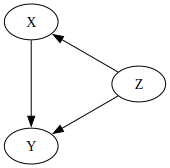

In [3]:
plot_causal_graph(my_graph)

# Train the Model


### Complete the Structural Causal Model
Now that you have defined the graph we have the variables and dependencies, but we still need to define ___

In [3]:
data = process_data('path_to_data')

# This will define how we determine the probabilities for variables whose values 
# were not observed/recorded. 
distribution = 'probability distribution for exogenous variables'

# Now define which columns of your data correspond to each node in your graph:
assignments = {
    'X': ['gender'],
    'Z': ['race', 'age'],
    'W': ['degree', 'num_awards'],
    'Y': ['salary']
}

my_model = Model(data=data, distribution=distribution, graph=my_graph, assignments=assignments)
### NOTE for reviewers: if the assignment contains a feature which is not in the data
# or if there is a duplicate of the same feature, this will throw an error. 
# If there is a feature in the data that was not assigned to any variable it will output
# a warning but otherwise be fine


It is okay to exclude features from the model but they will not be used in the causal analysis.
{'X': ['gender'], 'Z': ['race', 'age'], 'W': ['degree', 'num_awards'], 'Y': ['salary']}



/Users/Hanita/causal/ci2-fairness-ncm/trashfiles/dummy_functions.py:62: UserWarning: The following features were not assigned to any variable: {'incomplete'}
  warnings.warn('The following features were not assigned to any variable: {}'.format(unassigned_features), UserWarning)


When training the network, you are able to manually adjust various settings called "hyperparameters". These include the following:
* `pipeline_choice`: this specifies the type of neural network that will be ran. The options are as follows,
    * `'mle'`: Maximum Likelihood Estimator
    * `'gan'`: Generative Adversarial Network
    * `'ffn'`: Feed Forward Network
    The default is 'mle'. 
* `n-epochs`: the number of epochs, or passes through the dataset to complete during the training phase, to run. Default: 1000. 
* `batch-size`: number of training examples to use in each training epoch. 
* `gpu`: the GPU to use, if you have one. Default: none

You may set some, none, or all of these values manually. Valid definitions include:
```
hyperparameters = {
    'pipeline_choice': 'gan',
    'n-epochs': 500
}
```
```
hyperparameters = {}
```
```
hyperparameters = {
    'pipeline_choice': 'ffn',
    'n-epochs': 4600,
    'batch-size': 4,
    'gpu': gpu
}
```

In [6]:
hyperparameters = {
    'pipeline_choice': 'gan'
}

run_training(my_graph, my_model, hyperparameters)

training ran with: 
 Graph: <src.causalaibook.graph.classes.graph.Graph object at 0x1135c2ae0> 
 Model: <trashfiles.dummy_functions.Model object at 0x1134d0b30> 
 Params: {'pipeline_choice': 'gan'}


# Query the Model
Now that you have a trained model, you can query the model. 

In [7]:
# Calculate output after setting certain values

# Level 1: P(V=v), P(V=v|_)
# Level 2: P(V=v|do(_))
# Level 3: 

# Project onto the Standard Fairness Model

The standard fairness model (SFM) is a model whose graph has four nodes:
* *X*: The protected attribute. This ***fill in explanation***
* *Z*: The counfounding variables. This ***fill in explanation***
* *W*: The mediator variables. This ***fill in explanation***
* *Y*: The outcome variable. This ***fill in explanation***

When projecting onto the SFM, you should select one of your model's variables to be *X* and one to be *Y*, but you may assign multiple variables as confounders or mediators. Counfounders may have any relationship to the other confounders, and mediators may have any relationship with the other mediators, however there is a specific structure that must exist between *X*, *Z*, *W*, and *Y*:
* *Y* must be a variable that has 0 arrows pointing toward *X*, *Z*, or *W*.
* *W* must contain variables that have 0 arrows pointing toward *X* or *Z*.
* *X* and *Z* cannot have arrows pointing towards each other, but they may have a bidirected arrow between them. 

**Here is an example**:
Given the following graph. 

![example1graph.png](img/example1graph.png)

Based on this graph, you could do either of the following projections:
```
projection1 = {
    'X': 'e',
    'Z': ['a', 'b'],
    'W': ['c', 'd'],
    'Y': 'f'
}
```

or 
```
projection2 = {
    'X': 'a',
    'Z': ['e'],
    'W': ['b', 'c', 'd'],
    'Y': 'f'
}
```

![](img/ex1projection1.png) ![](img/ex1projection2.png)

The following would **not** be a valid projection: 
```
bad_projection = {
    'X': 'a',
    'Z': ['b', 'e'],
    'W': ['c', 'd'],
    'Y': 'f'
}
```
because there is an arrow from the `X` variable (containing `'a'`) to the `Z` variable (containing `'b'`). This indicates that `X` may actually cause `Z`, rather than just being confounded with `Z`. 

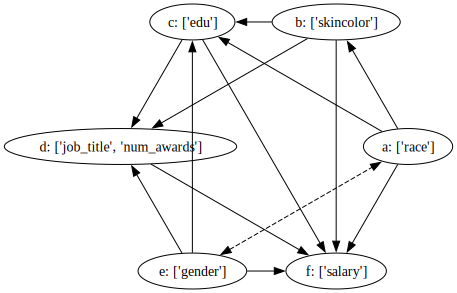

In [80]:
cg = example1()
cg.plot(2)

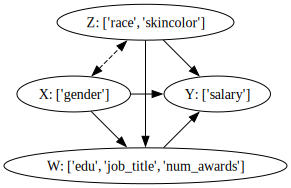

In [79]:
projection = {
    'X': 'e',
    'Z': ['a', 'b'],
    'W': ['c', 'd'],
    'Y': 'f'
}
# def project_to_sfm(graph, projection):
#     W,X,Y,Z = 'W','X','Y','Z'
#     nodes = [Y,Z,X,W]
#     edges = [
#         [X,Z,'bidirected'],
#         [X,W],
#         [X,Y],
#         [Z,W],
#         [Z,Y],
#     ]
def get_sfm_graph():
    return '''<NODES>
Y
Z
X
W

<EDGES>
X -> Y
X -> W
Z -> Y
Z -> W
W -> Y
X -- Z
'''

# z = c, z = d
# graph.assignments[z=c] = ['edu'], graph.assignments[z=d]=['job','award']

# want graph.assignments[c][0], graph.assignments[d][0], graph.assignments[d][1]


# [[edu],[job, num]]
# 

cg = CG(nodes=nodes,edges=edges,assignments=assignments)

def project_to_sfm(graph, projection):
    assignments = {
        'X': [*graph.assignments[projection['X']]],
        'Z': sum([graph.assignments[z] for z in projection['Z']],[]),
        'W': sum([graph.assignments[z] for z in projection['W']],[]),
        'Y': [*graph.assignments[projection['Y']]]
    }
    sfm = CG(graph=parseGraph(get_sfm_graph()), assignments=assignments)
    return sfm 

sfm = project_to_sfm(cg, projection)
sfm.plot()

# Run Fairness Tasks